In [128]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import geopy
import folium
import numpy as np
import matplotlib.pyplot as plt

## Request get html page

In [3]:
res = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

## Get table content using BeautifulSoup

In [4]:
soup = BeautifulSoup(res.content, "html")
table = soup.find_all('table')

# Html table to pandas dataframe

In [5]:
df = pd.read_html(str(table[0]))[0]
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [6]:
#Remove record where Borough=Not assigned from fataframe

In [7]:
df = df.query('Borough != "Not assigned"')
df.Borough.value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East Toronto         5
East York            5
Mississauga          1
Name: Borough, dtype: int64

In [8]:
df.shape

(103, 3)

# geocoding

In [12]:
import geocoder # import geocoder

def get_lat_lon(postal_code):
# initialize your variable to None
    lat_lng_coords = None
    tt=0

    # loop until you get the coordinates
    while(lat_lng_coords is None and tt<10) :
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        tt = tt+1
        lat_lng_coords = g.latlng
        
    return lat_lng_coords

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

In [16]:
#locs = df['Postal code'].apply(lambda x: get_lat_lon(x))
locs

In [17]:
dfxy = pd.read_csv('https://cocl.us/Geospatial_data')

In [18]:
dfxy.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:
df = df.merge(dfxy.rename(columns={'Postal Code':'Postal code'}), on='Postal code')
df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North,43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...,43.636258,-79.498509


In [20]:
# column names to lower case
df.columns=df.columns.str.lower().str.replace(' ','_')

# Explore Data

In [21]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [87]:
df[['borough','neighborhood']].groupby('borough').count()

,neighborhood
borough,
Central Toronto,9
Downtown Toronto,19
East Toronto,5
East York,5
Etobicoke,12
Mississauga,1
North York,24
Scarborough,17
West Toronto,6


#  map of Toronto 

In [27]:
address = 'Toronto, Ontario'

geolocator = geopy.geocoders.Nominatim(user_agent="cours_capt_proj")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [28]:
# create map of Toronto using latitude and longitude values
m = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['borough'], df['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(m)  
    
m

In [89]:
downtown_data = df[df['borough'].str.contains('Toronto')].reset_index(drop=True)
downtown_data

,postal_code,borough,neighborhood,latitude,longitude
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568
9,M6H,West Toronto,Dufferin / Dovercourt Village,43.669005,-79.442259


In [93]:
address = 'Central Toronto, Toronto, Ontario'

geolocator = geopy.geocoders.Nominatim(user_agent="cours_capt_proj")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of  Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Downtown Toronto are 43.6449033, -79.3818364.


In [91]:
from folium.plugins import MeasureControl

In [96]:
# create map of Downtown Toronto using latitude and longitude values
m = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(downtown_data['latitude'], downtown_data['longitude'], 
                                           downtown_data['borough'], downtown_data['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(m)  
    
m.add_child(MeasureControl())    
m

# Foursquare id

In [39]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# functions for venues

In [98]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# get 100 venues in each neighborhood Downtown Toronto within a radius of 500 meters.

In [99]:
downtown_venues = getNearbyVenues(names=downtown_data['neighborhood'],
                                   latitudes=downtown_data['latitude'],
                                   longitudes=downtown_data['longitude'],
                                   radius=500
                                  )

Regent Park / Harbourfront
Queen's Park / Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
The Danforth West / Riverdale
Toronto Dominion Centre / Design Exchange
Brockton / Parkdale Village / Exhibition Place
India Bazaar / The Beaches West
Commerce Court / Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park / The Junction South
North Toronto West
The Annex / North Midtown / Yorkville
Parkdale / Roncesvalles
Davisville
University of Toronto / Harbord
Runnymede / Swansea
Moore Park / Summerhill East
Kensington Market / Chinatown / Grange Park
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Roseda

In [100]:
downtown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park / Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park / Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park / Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park / Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Regent Park / Harbourfront,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


# Venues per Neighboroud

In [101]:
downtown_venues.Neighborhood.value_counts()\
                            .reset_index()\
                            .rename(columns={'index':'Neighborhood','Neighborhood':'count'})

,Neighborhood,count
0,Commerce Court / Victoria Hotel,100
1,Toronto Dominion Centre / Design Exchange,100
2,"Garden District, Ryerson",100
3,First Canadian Place / Underground city,100
4,Harbourfront East / Union Station / Toronto Is...,100
5,Stn A PO Boxes,97
6,Richmond / Adelaide / King,94
7,St. James Town,84
8,Church and Wellesley,72
9,Central Bay Street,65


# Number of venues per category

In [102]:
downtown_venues['Venue Category'].value_counts()\
                            .reset_index()\
                            .rename(columns={'index':'Venue Category','Venue Category':'count'})

,Venue Category,count
0,Coffee Shop,140
1,Café,92
2,Restaurant,58
3,Italian Restaurant,48
4,Hotel,38
...,...,...
225,Skate Park,1
226,Ethiopian Restaurant,1
227,Coworking Space,1
228,College Arts Building,1


# Examine venues in each Neighborhood

In [103]:
downtown_venues = downtown_venues[downtown_venues['Venue Category'] !='Neighborhood']

In [104]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")
downtown_onehot.index = downtown_venues['Neighborhood'] 
downtown_onehot = downtown_onehot.reset_index()
downtown_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]
downtown_onehot

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000
1,Brockton / Parkdale Village / Exhibition Place,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Business reply mail Processing CentrE,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CN Tower / King and Spadina / Railway Lands / ...,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.015385
5,Christie,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.013889,0.000000,0.000000,...,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778
7,Commerce Court / Victoria Hotel,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
downtown_grouped.shape

(39, 230)

In [110]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Create the new dataframe and display the top 10 venues for each neighborhood.

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

# Which is the optimal number of clusters?

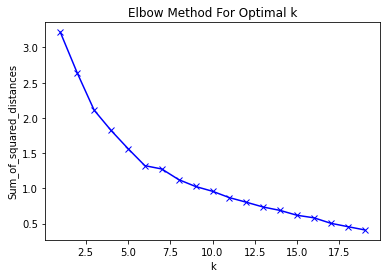

In [131]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(downtown_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Create 6 clusters using kmeans

In [167]:
# import k-means 
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5}

# add cluster label to data

In [169]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_data_with_cluster = downtown_data



In [173]:

downtown_data_with_cluster = downtown_data_with_cluster.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), 
                                                             left_on='neighborhood',
                                                             right_on='Neighborhood')

downtown_data_with_cluster.head() # check the last columns!

,postal_code,borough,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,4,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Theater,Dessert Shop,Chocolate Shop
1,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,4,Coffee Shop,Diner,Sushi Restaurant,Yoga Studio,Beer Bar,Bank,Bar,Discount Store,Spa,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Japanese Restaurant,Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Tea Room,Bookstore
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Café,Coffee Shop,Cocktail Bar,Gastropub,American Restaurant,Hotel,Italian Restaurant,Clothing Store,Art Gallery,Seafood Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Trail,Health Food Store,Pub,Yoga Studio,Dance Studio,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [176]:
downtown_data_with_cluster['Cluster Labels'].value_counts()

4    33
3     2
5     1
2     1
1     1
0     1
Name: Cluster Labels, dtype: int64

In [175]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_data_with_cluster['latitude'], 
                                  downtown_data_with_cluster['longitude'], 
                                  downtown_data_with_cluster['neighborhood'], 
                                  downtown_data_with_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Comments </br>
neighborhoods in central Toronto ara quite homogeneous, so we get a Cluster containing the majority of neighborhoods and other 5 cluster containing outliers 

In [133]:
X=downtown_grouped_clustering

In [161]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.35, min_samples=3).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(set(labels)) 
  


{0, -1}


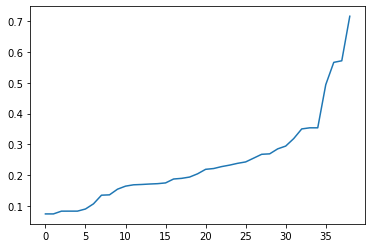

In [160]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
#display(nbrs.kneighbors(X))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

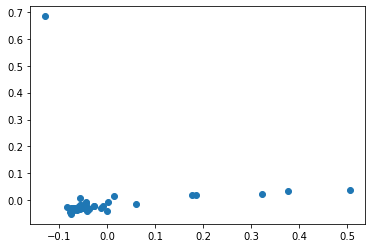

In [158]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xc = pca.transform(X)
plt.scatter(Xc.T[0], Xc.T[1])

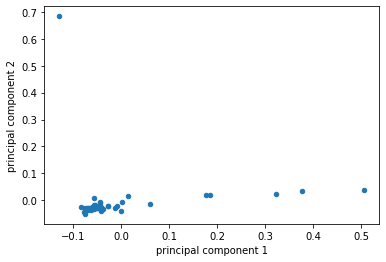

In [166]:
principalDf = pd.DataFrame(data = Xc
             , columns = ['principal component 1', 'principal component 2'])
principalDf.plot(kind='scatter',x='principal component 1',y= 'principal component 2')